# Exploring Aggregated Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from pyspark import SparkContext
from pyspark.sql import SQLContext

In [10]:
from pyspark.sql import functions as F

In [3]:
sc = SparkContext("local", "Exploring Aggregated Dataset")
sql = SQLContext(sc)

In [4]:
df = sql.read.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .option("inferschema", "true") \
    .load("/hdfs/salespred/output/sales_aggregated.csv") 

In [7]:
df.columns

['date_block_num',
 'shop_id',
 'item_id',
 'shop_name',
 'item_name',
 'item_category_name',
 'min_date',
 'max_date',
 'avg_item_price',
 'item_cnt_month']

In [8]:
df.select(['avg_item_price', 'item_cnt_month']).summary().show()

+-------+------------------+-----------------+
|summary|    avg_item_price|   item_cnt_month|
+-------+------------------+-----------------+
|  count|           1608226|          1608226|
|   mean|  790.150969784679|2.273155016770031|
| stddev|1549.3096580545455|8.653235659574346|
|    min|              0.09|              1.0|
|    25%|             199.0|              1.0|
|    50%|             399.0|              1.0|
|    75%| 894.7766666666666|              2.0|
|    max|          307980.0|           2253.0|
+-------+------------------+-----------------+



## Exploring Date Blocks Num

In [73]:
block_sales = df.groupby(["date_block_num"]).agg(
    F.first("max_date").alias("date"),
    F.sum("avg_item_price").alias("total_value"),
    F.sum("item_cnt_month").alias("total_items")
)
block_sales = block_sales.toPandas()
block_sales.head()

,date_block_num,date,total_value,total_items
0,31,2015-08-15,3.097896e+07,66196.0
1,28,2015-05-08,3.153760e+07,72435.0
2,27,2015-04-05,3.232694e+07,77948.0
3,26,2015-03-07,3.859296e+07,82233.0
4,12,2014-01-07,3.833654e+07,117243.0


In [74]:
block_sales = block_sales.sort_values(by="date_block_num", ascending=True)
block_sales.head()

,date_block_num,date,total_value,total_items
32,0,2013-01-25,4.112294e+07,131850.0
6,1,2013-02-13,3.810089e+07,128382.0
30,2,2013-03-17,4.116525e+07,147438.0
10,3,2013-04-14,3.449906e+07,107439.0
17,4,2013-05-18,3.273764e+07,107148.0


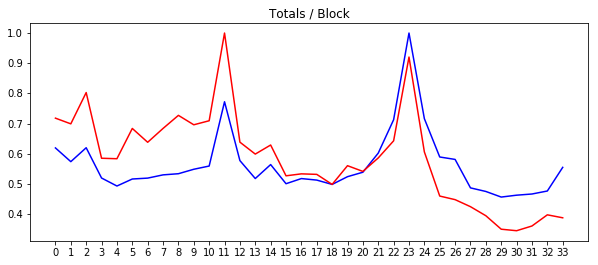

In [98]:
plt.figure(figsize=(10,4))

plt.title("Totals / Block")

x = block_sales["date_block_num"]

y1 = block_sales["total_value"] / block_sales["total_value"].max()
y2 = block_sales["total_items"] / block_sales["total_items"].max()

plt.plot(block_sales["date_block_num"], y1, color='blue')
plt.plot(block_sales["date_block_num"], y2, color='red')
plt.xticks(np.arange(len(x)), x)

plt.show();